In [41]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [42]:
img_sld = cv2.imread('img/P1020018.JPG')
img_blk = cv2.imread('img/P1020060.JPG')

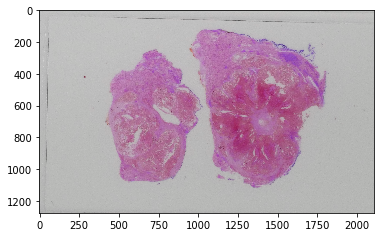

In [43]:
height = img_sld.shape[0]
width = img_sld.shape[1]
crop_img_sld = img_sld[980:(height-1200), 1500:(width-1000)]
plt.imshow(crop_img_sld)
plt.show()

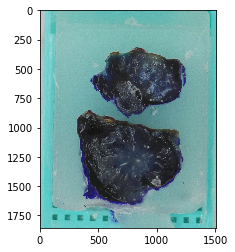

In [44]:
height = img_blk.shape[0]
width = img_blk.shape[1]
crop_img_blk = img_blk[800:(height-800), 1500:(width-1600)]
plt.imshow(crop_img_blk)
plt.show()